# Merges and Hierarchical Indexing

**file names postet on Slack were different, please edit.**

In [1]:
import pandas as pd

In [2]:
population = pd.read_excel("bevoelkerung.xlsx")
continents = pd.read_csv("continents.csv", sep=";")

### SQL-like merge
with options 'inner', 'outer', 'left', 'right'

In [12]:
# merge continent data into population
df = pd.merge(left=continents, right=population,
              left_on="country", right_on="Total population",
              how="inner")
df.head(3)

,continent,country,Total population,1800,1810,1820,1830,1840,1850,1860,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Africa,Algeria,Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0
1,Africa,Angola,Angola,1567028.0,1567028.0,1597530.0,1686390.0,1813100.0,1949329.0,2110747.0,...,18541467.0,19183907.0,19842251.0,20520103.0,21219954.0,21942296.0,22685632.0,23448202.0,24227524.0,25021974.0
2,Africa,Benin,Benin,636559.0,636559.0,653348.0,702829.0,774654.0,853818.0,941469.0,...,8443717.0,8707637.0,8973525.0,9240982.0,9509798.0,9779391.0,10049792.0,10322232.0,10598482.0,10879829.0


### Read other files
The CSV reader parses the column names to integers while the XLSX reader does not. The conversion below is done with a **list comprehension**.

In [13]:
fertility = pd.read_csv("fruchtbarkeit.csv")
fertility.columns = ["fertility"] + [int(year) for year in fertility.columns[1:]]
fertility.head(3)

,fertility,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.7,6.46,6.2,5.93,5.66,5.4,5.14,4.9,4.68,4.47
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
lifeexp = pd.read_excel("lebenserwartung.xlsx")
lifeexp.head(3)

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Limits of merge
With overlapping column names, the `merge` function is not that useful. Column names in the **wide format** get messed up.

In [18]:
df2 = pd.merge(left=df, right=fertility,
              left_on="country", right_on="fertility",
              how="inner")
df2.head(3)

,continent,country,Total population,1800_x,1810_x,1820_x,1830_x,1840_x,1850_x,1860_x,...,2006_y,2007_y,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y
0,Africa,Algeria,Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71
1,Africa,Angola,Angola,1567028.0,1567028.0,1597530.0,1686390.0,1813100.0,1949329.0,2110747.0,...,6.60,6.52,6.43,6.33,6.22,6.10,5.98,5.86,5.75,5.65
2,Africa,Benin,Benin,636559.0,636559.0,653348.0,702829.0,774654.0,853818.0,941469.0,...,5.46,5.37,5.27,5.18,5.10,5.01,4.93,4.85,4.77,4.69


### Long format
**Stacking** the data into the **long format** gives us more flexibility what is a column and what not. We can apply `stack()` and `unstack()` on the fly to make selecting what we want easier.

In [19]:
s_pop = population.set_index("Total population").stack()
s_life = lifeexp.set_index("Life expectancy").stack()
s_fert = fertility.set_index("fertility").stack()
s_fert.head(3)

fertility        
Afghanistan  1800    7.0
             1801    7.0
             1802    7.0
dtype: float64

Creating a new df is easier than merging. Converting a dict of lists or list of lists to df is also a good fallback option in other situations.

In [ ]:
data = pd.DataFrame({
    "population": s_pop,
    "life expectancy": s_life,
    "fertility": s_fert,
})

Create an even longer format:

In [21]:
long = data.stack()
long.head(3)

Afghanistan  1800  population         3280000.00
                   life expectancy         28.21
                   fertility                7.00
dtype: float64

example unstack, change the (1) to 0 or 2 as well:

In [ ]:
long.unstack(1).head(3)

1800  1801   1802   1803   1804   1805  \
Afghanistan population       3280000.00   NaN    NaN    NaN    NaN    NaN   
            life expectancy       28.21  28.2  28.19  28.18  28.17  28.16   
            fertility              7.00   7.0   7.00   7.00   7.00   7.00   

                              1806   1807   1808   1809  ...         2007  \
Afghanistan population         NaN    NaN    NaN    NaN  ...  25877544.00   
            life expectancy  28.15  28.14  28.13  28.12  ...        52.40   
            fertility         7.00   7.00   7.00   7.00  ...         6.46   

                                   2008         2009         2010        2011  \
Afghanistan population       26528741.0  27207291.00  27962207.00  28809167.0   
            life expectancy        52.8        53.30        53.60        54.0   
            fertility               6.2         5.93         5.66         5.4   

                                    2012        2013         2014  \
Afghanistan population       29726803.00  30682500.0  31627506.00   
            life expectancy        54.40        54.8        54.90   
            fertility               5.14         4.9         4.68   

                                    2015   2016  
Afghanistan population       32526562.00    NaN  
            life expectancy        53.80  52.72  
            fertility               4.47    NaN  

[3 rows x 217 columns]

Get rid of the hierarchical index:

In [28]:
data2 = data.reset_index()
data2.columns = ["country", "year", "pop", "lifeexp", "fert"]
data2.head(3)

,country,year,pop,lifeexp,fert
0,Afghanistan,1800,3280000.0,28.21,7.0
1,Afghanistan,1801,NaN,28.20,7.0
2,Afghanistan,1802,NaN,28.19,7.0


Merge continent data into population

In [29]:
df = pd.merge(left=data2, right=continents,
              left_on="country", right_on="country",
              how="inner")
df = df.dropna()
df.head()

,country,year,pop,lifeexp,fert,continent
0,Afghanistan,1800,3280000.0,28.21,7.0,Asia
10,Afghanistan,1810,3280000.0,28.11,7.0,Asia
20,Afghanistan,1820,3323519.0,28.01,7.0,Asia
30,Afghanistan,1830,3448982.0,27.90,7.0,Asia
40,Afghanistan,1840,3625022.0,27.80,7.0,Asia


In [30]:
# !pip install plotly

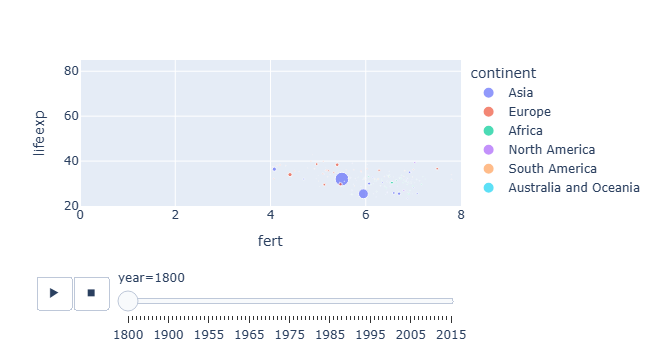

In [31]:
import plotly.express as px

fig = px.scatter(df,
                 x="fert",
                 y="lifeexp",
                 animation_frame="year",
                 size="pop",
                 color="continent",
                 hover_name="country",
                 #log_x=True, 
                 range_x=[0, 8],
                 range_y=[20, 85],
                )
fig.show()

In [26]:
# merge continent data into population
# outer join to find out which countries are spelled differently
df = pd.merge(left=continents, right=population,
              left_on="country", right_on="Total population",
              how="outer")
df[df["continent"].isna()]

,continent,country,Total population,1800,1810,1820,1830,1840,1850,1860,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,NaN,NaN,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,American Samoa,8170.0,8156.0,8142.0,8128.0,8114.0,7958.0,7564.0,...,58648.0,57904.0,57031.0,56226.0,55636.0,55316.0,55227.0,55302.0,55434.0,55538.0
8,NaN,NaN,Anguilla,2025.0,2025.0,2064.0,2177.0,2338.0,2511.0,2693.0,...,12903.0,13145.0,13365.0,13571.0,13768.0,13956.0,14133.0,14300.0,14460.0,14614.0
9,NaN,NaN,Antarctica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,NaN,NaN,West Bank and Gaza,165944.0,165944.0,165944.0,165944.0,165944.0,169606.0,181738.0,...,3662561.0,3754693.0,3854667.0,3959988.0,4068780.0,4181135.0,4297826.0,4418341.0,4542059.0,4668466.0
286,NaN,NaN,West Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65567237.0,65680674.0,65794308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,NaN,NaN,Western Sahara,2788.0,2788.0,2882.0,3161.0,3574.0,4041.0,4536.0,...,448666.0,466991.0,483167.0,497986.0,512065.0,525388.0,537779.0,549538.0,561034.0,572540.0
289,NaN,NaN,Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23887171.0,23946096.0,23988543.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
